In [1]:
# !pip install ultralytics

In [2]:
# Install dependencies
!pip uninstall -y ultralytics
!pip install git+https://github.com/ultralytics/ultralytics.git@main
!pip install -r requirements.txt
!pip install roboflow supervision --upgrade -q

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-1w92wlye
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-1w92wlye
  Resolved https://github.com/ultralytics/ultralytics.git to commit 1b385a12519ad0e1f19fc42d4cfa152ab58e8189
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="4OiDMztaT67GHFI6BH6h")
project = rf.workspace("fuzzybrain").project("ta_merged_v4")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TA_merged_v4-1 in yolov11:: 100%|██████████| 4042/4042 [00:00<00:00, 7288.68it/s]


In [4]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')  # Load YOLOv12 pretrained model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 182MB/s]


In [5]:
results = model.train(
  data=f'{dataset.location}/data.yaml',  # Path dataset dari Roboflow
  epochs=100,       # Jumlah epoch
  batch=16,         # Batch size
  imgsz=640,        # Ukuran input image
  optimizer='AdamW', # Optimizer
  lr0=0.0005,      
)

Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/TA_merged_v4-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1305.1±348.0 MB/s, size: 55.1 KB)


train: Scanning /kaggle/working/TA_merged_v4-1/train/labels... 1660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1660/1660 [00:01<00:00, 1372.43it/s]


train: New cache created: /kaggle/working/TA_merged_v4-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 839.9±433.4 MB/s, size: 63.3 KB)


val: Scanning /kaggle/working/TA_merged_v4-1/valid/labels... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<00:00, 1886.68it/s]

val: New cache created: /kaggle/working/TA_merged_v4-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.01G      1.854      1.768       1.35         78        640: 100%|██████████| 104/104 [01:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        237        944       0.84      0.662      0.788      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.19G      1.537      1.026      1.192         60        640: 100%|██████████| 104/104 [01:11<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.863      0.783      0.856       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.16G      1.471     0.9376      1.172         86        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.874      0.755      0.841      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.24G      1.438     0.8934       1.16         41        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.898      0.784       0.86      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.21G      1.388      0.836      1.148         73        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.889       0.78      0.867      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.25G      1.363     0.8045      1.135         70        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.908      0.839      0.903      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.24G      1.372     0.7836      1.128         59        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.905      0.812      0.892      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.24G      1.331     0.7543      1.117         34        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.886       0.82      0.898      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.28G      1.334     0.7535      1.114         95        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.903      0.806      0.897      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.26G      1.276     0.7078      1.101         52        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.876      0.859      0.908      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.25G      1.293     0.7067      1.098         68        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.918      0.843      0.916      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.28G      1.237     0.6889      1.082         44        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.906      0.859      0.924      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.24G      1.274     0.6919      1.091         36        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.895      0.805      0.894       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.23G      1.214     0.6522       1.07         82        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.921      0.852      0.916      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.25G      1.219     0.6631      1.072         56        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        237        944      0.927      0.842      0.924      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.16G      1.217     0.6577      1.071         45        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.901      0.854      0.911      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.24G      1.199     0.6517      1.061         91        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.919      0.847      0.924      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.25G      1.232     0.6409      1.069         66        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.944      0.843      0.927      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.18G      1.177     0.6154       1.06         72        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.928       0.84      0.924      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.24G      1.186     0.6188      1.054         89        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        237        944      0.898      0.836      0.897      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.24G      1.168     0.6142      1.051         82        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.932      0.866      0.937      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.26G       1.16        0.6      1.056         43        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.918      0.856      0.924      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.24G      1.162     0.6044      1.044         50        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.933      0.868      0.926       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.18G      1.141     0.5911      1.039        107        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.931      0.877      0.932      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.24G      1.159     0.5926      1.043         49        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.921      0.875      0.936      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.24G       1.14     0.5769      1.039         66        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.912      0.867      0.918      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.25G      1.118     0.5711      1.026         65        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.942      0.877       0.94      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.25G      1.113     0.5655      1.035         66        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.937      0.861      0.932      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.24G      1.097     0.5625      1.025         73        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.935      0.868      0.938      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.25G      1.106     0.5593      1.022         60        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.911      0.883       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.25G      1.092      0.558      1.022         53        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.907      0.907      0.949      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.25G      1.081     0.5509      1.015         62        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.903      0.891      0.936       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.21G      1.089     0.5607      1.007         66        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.915      0.893      0.941      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.28G       1.05     0.5296      1.001         56        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.914      0.873       0.94      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.24G      1.056     0.5293      1.012         61        640: 100%|██████████| 104/104 [01:12<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944       0.92      0.884      0.948       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.25G      1.047      0.525      1.001         71        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.948      0.875      0.951      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.13G      1.051     0.5278      1.006         45        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.932      0.891       0.94      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.21G      1.042     0.5264      1.004         72        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.934      0.871      0.936       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.24G      1.039      0.522      1.004         74        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.926      0.883      0.942      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.23G      1.041     0.5213      1.007         50        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.913      0.884      0.937      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.16G      1.006     0.4992     0.9911         96        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.929      0.868      0.946      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.26G     0.9997      0.505     0.9829         69        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.928       0.88      0.937      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.24G      1.006     0.5043     0.9871         71        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.937      0.876      0.939      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.25G       1.01     0.5047       0.99         92        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.945       0.87      0.939      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.19G     0.9944     0.4943      0.982         74        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.913        0.9      0.938      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.16G       1.01     0.4991     0.9852         44        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.919      0.887      0.942      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.21G      1.002     0.4922     0.9829         49        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.929      0.888      0.941      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.26G     0.9694     0.4777     0.9774         55        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.923      0.889      0.939      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.24G      0.985     0.4762     0.9798         90        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944       0.93      0.876      0.932       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.26G     0.9784     0.4915     0.9765         66        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944       0.93      0.881      0.938      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.28G     0.9546     0.4703     0.9667         64        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.923      0.873      0.936      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.21G     0.9517     0.4787     0.9683         63        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.944      0.866      0.939      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.27G     0.9454     0.4638     0.9671         72        640: 100%|██████████| 104/104 [01:12<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.933      0.886      0.932      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.24G     0.9436      0.464     0.9678         68        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.913      0.897      0.939      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.23G     0.9338     0.4597     0.9593         41        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944       0.95      0.863      0.938      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.25G     0.9348     0.4586      0.961         53        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.935      0.886       0.95      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.22G     0.9332     0.4622      0.966         84        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.936      0.874      0.944      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.21G     0.9401     0.4648       0.96         70        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.921      0.889      0.941      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.27G     0.9158     0.4505     0.9535         97        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.928      0.877      0.945      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.22G     0.9333     0.4555     0.9545         56        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.932      0.885      0.948      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.24G     0.9091     0.4489      0.954         87        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.941      0.872      0.937      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.22G     0.9045     0.4465     0.9428         65        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.945      0.877      0.934      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.26G     0.8893     0.4364     0.9454         54        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.925      0.895      0.945       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.25G     0.8916     0.4387     0.9439         45        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.935      0.877      0.939      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.24G     0.9054     0.4418     0.9466         48        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.944      0.887      0.942      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.28G     0.8739     0.4271      0.942         52        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.922      0.899       0.94      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.25G     0.8717     0.4305     0.9369         43        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944       0.94      0.896      0.947       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.17G     0.8702     0.4321     0.9434         52        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.938      0.888      0.944      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.11G     0.8651     0.4247     0.9414         83        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.931      0.891      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.23G     0.8766     0.4324     0.9478         63        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.933      0.889      0.941      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.27G     0.8573     0.4185     0.9312         53        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.937      0.883      0.947      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.24G     0.8556     0.4193     0.9372         47        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.925      0.902      0.949      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.19G     0.8416      0.413     0.9325         71        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.932      0.892      0.943      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.24G      0.827     0.4096     0.9257         54        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.919      0.915      0.944      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.25G      0.844     0.4105     0.9332         63        640: 100%|██████████| 104/104 [01:13<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.929      0.895      0.948      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.24G     0.8361     0.4108     0.9327         76        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.932      0.893      0.943      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.25G     0.8256     0.4024     0.9255         68        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.939      0.888      0.945      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.24G     0.8191     0.4061     0.9204         55        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944      0.928       0.89      0.942      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.27G     0.8128     0.3981     0.9196         51        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.937      0.885      0.943      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.22G     0.7953     0.3897     0.9236         86        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.926      0.903      0.941      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.18G      0.819        0.4     0.9179         58        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.944      0.888      0.943      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.25G      0.794      0.388     0.9245         51        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.928      0.892      0.936      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.24G     0.7991     0.3935     0.9181         45        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.923      0.894      0.944      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.25G     0.7893     0.3864     0.9112         59        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.931      0.889      0.942      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.16G     0.7906      0.388     0.9105         80        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.916      0.906      0.945      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.22G     0.7754     0.3759     0.9068         71        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.933      0.894      0.944      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.25G     0.7863     0.3847     0.9168         72        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.929      0.892      0.942      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.23G     0.7814     0.3835     0.9092         86        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944       0.93      0.906      0.947      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.25G     0.7796     0.3779     0.9135         77        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944       0.93      0.895      0.941      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.23G     0.7748     0.3806     0.9096         45        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944       0.93       0.89      0.941      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.24G     0.7696     0.3635     0.9338         54        640: 100%|██████████| 104/104 [01:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.924      0.896       0.94      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.26G     0.7449     0.3546     0.9237         58        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        237        944      0.932      0.887      0.936      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.24G     0.7351      0.352     0.9234         41        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.932      0.888      0.938      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.23G     0.7262       0.35     0.9202         48        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.931      0.884      0.944      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.22G     0.7085     0.3401     0.9149         83        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        237        944       0.93      0.896      0.943      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.24G     0.7149     0.3391     0.9117         44        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.936      0.893      0.944      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.24G     0.7098     0.3403     0.9086         47        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.935      0.893      0.944      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.22G     0.7065     0.3411     0.9131         42        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        237        944      0.936      0.887      0.944      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.24G     0.7027     0.3389     0.9073         57        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.926      0.898      0.945      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.21G     0.6982     0.3354     0.9088         52        640: 100%|██████████| 104/104 [01:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        237        944      0.935      0.894      0.945      0.656



100 epochs completed in 2.171 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
invalid value encountered in less
invalid value encountered in less


                   all        237        944      0.936      0.893      0.944      0.661
                     0        201        637       0.94      0.932      0.974      0.676
                     1        217        307      0.932      0.854      0.914      0.645
Speed: 0.2ms preprocess, 14.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


Ultralytics 8.3.162 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1688.0±255.6 MB/s, size: 66.4 KB)


val: Scanning /kaggle/working/TA_merged_v4-1/valid/labels.cache... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]
invalid value encountered in less
invalid value encountered in less


                   all        237        944      0.936      0.893      0.945      0.661
                     0        201        637       0.94      0.931      0.974      0.678
                     1        217        307      0.932      0.855      0.916      0.645
Speed: 1.4ms preprocess, 32.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


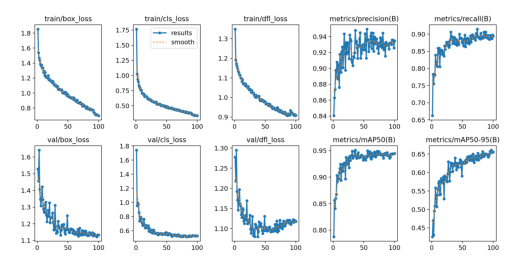

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Cek hasil training
metrics = model.val()

# hasil grafik
results_path = "/kaggle/working/runs/detect/train/results.png"
img = plt.imread(results_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [7]:
# !zip -r working.zip /kaggle/working
# !zip -r /kaggle/working/working.zip /kaggle/working
# !ls -lh /kaggle/working 
# !mv /kaggle/working/working.zip /kaggle/input/ 

In [8]:
# from IPython.display import FileLink
# FileLink('working.zip')